## Logistic Regression Modeling and some EDA using: 
### - Transformer: CountVectorizer
### - Stemmed words

In [13]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Other Sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

### Loading Data and Splitting Data

In [14]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen tolkien red book wonder somebodi could ...,happened tolkien red book wondering somebody c...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth lotr silma...,like purchase matching set book everything lot...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [15]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [16]:
# Set up X and y
X = df['clean_text_stem']
y = df['subreddit']

In [17]:
# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    random_state=42)

In [18]:
X_train

498      new sub question tolkien dislik allegori tl dr...
14273                        saw other post hp tattoo mine
7535     new orc come hear sauron occupi barad dur orc ...
5342                                children hurin illustr
6665     introduc lord ring read book peter jackson mov...
                               ...                        
16189    mani book print anyon happen know mani first u...
3539     melkor notic melkor stori tend mimic lucif man...
16493                    song whould play gryffindor parti
4353     sauron hunt fellowship purpos pool watcher mor...
5268     illustr version unfinish tale art alan lee joh...
Name: clean_text_stem, Length: 14266, dtype: object

In [19]:
X_train.sample(100)

15641    file var mobil librari sm attach 34 04 08968c4...
8349     silmarillion finish silmarillion damn much cha...
15548    moodi fraud biggest betray childhood shit hurt...
13943    peopl blame snape dumbledor die other blame dr...
11612                                     snape middl name
                               ...                        
8868     stori aelfwin read aelfwin anglo saxon 10th ce...
5972     thank r tolkienfan tolkien phd complet hi ever...
7122     lotr main charact aagoran decid becom king dec...
13103    know luna introduc book 5 4 wonder think took ...
4421                                  tell smaug backstori
Name: clean_text_stem, Length: 100, dtype: object

### Modeling Logistic Regression

In [20]:
# Baseline accuracy 
y_test.value_counts(normalize=True)

tolkienfans    0.516821
harrypotter    0.483179
Name: subreddit, dtype: float64

In [21]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [22]:
# Creates the pipe parameters 
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df':[1, 2],
    'cvec__max_df':[0.90, 0.98],
    'cvec__ngram_range':[(1,1), (1,2)],
    'logreg__C': [1, 0.1, 0.01]
}

In [24]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [26]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  5.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=4,
             param_grid={'cvec__max_df': [0.9, 0.98],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'logreg__C': [1, 0.1, 0.01]},
             verbose=1)

In [27]:
# prints the CV accuracy score from the gridsearch
gs.best_score_

0.9679655121509931

In [28]:
# assigns variables names to the training and testing accuracy scores and prints it out
train1, test1 = gs.score(X_train, y_train), gs.score(X_test, y_test)
train1, test1

(0.9903967475115659, 0.9684608915054668)

In [29]:
# returns the best parameters from the gridsearch
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'logreg__C': 1}

#### Evaluation

In [30]:
# Creates y predictions and calculates the AUC score
y_preds = gs.predict(X_test)
auc = roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])

In [31]:
# Creates the model metrics row dataframe and saves it as a csv to be added to final model metrics table in presentation
results = pd.DataFrame({'Model': ['Logistic'], 
                        'Transformer': ['CountVectorizer'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../../data/result_scores/logreg_countvect_stem.csv')

In [32]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,Logistic,CountVectorizer,Stemmed,0.990397,0.968461,0.995426


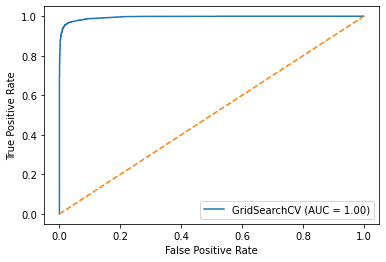

In [33]:
# plots the ROC curve and visualizes the AUC score
plot_roc_curve(gs, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

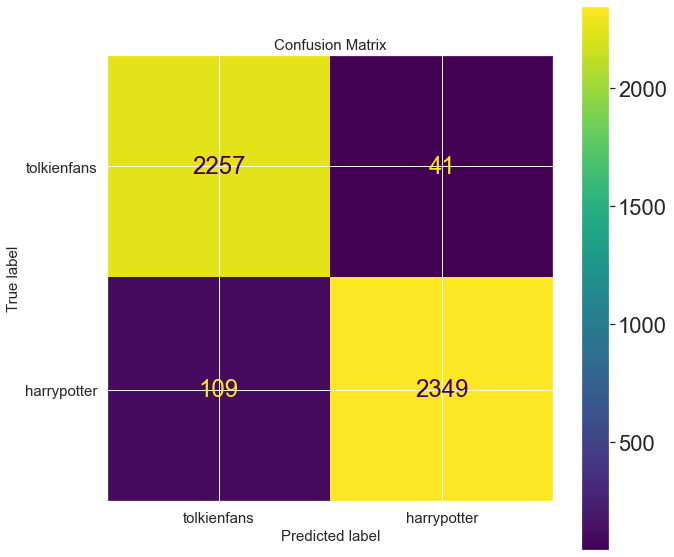

In [34]:
# Creates the confusion matrix and saves it as a jpg
sns.set(font_scale=2.0)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../../presentation/imgs/cm_logreg_countvect_stem.jpg')

In [35]:
# Creates the coef dictionary dataframe, and prints the 10 smallest coefficients
coefs = gs.best_estimator_.named_steps['logreg'].coef_
coefs = coefs.ravel()

names = gs.best_estimator_.named_steps['cvec'].get_feature_names()

coef_dict = pd.DataFrame({'coefs': coefs,
                      'features': pd.Series(names)})
coef_dict.nsmallest(10, columns=['coefs'])

,coefs,features
2099,-2.584748,hogwart
1985,-2.578733,harri
4016,-2.351356,snape
2050,-2.163383,hermion
3306,-2.110504,potter
4682,-2.087716,voldemort
1238,-2.063796,dumbledor
2140,-1.853804,hp
4698,-1.815666,wand
3479,-1.746599,ravenclaw


In [36]:
# Prints out the 10 largest coefficients
coef_dict.nlargest(10, columns=['coefs'])

,coefs,features
4427,5.078794,tolkien
2089,3.693027,hobbit
2608,3.413844,lotr
3952,3.278614,silmarillion
3769,2.485766,sauron
3670,2.346373,ring
1337,2.223967,elv
3096,2.088742,orc
3766,2.082850,saruman
2857,2.013387,morgoth
